✅ Data loaded successfully!
📊 Data Shape: (240, 8)

🔍 First 5 rows:
        Date                   File Name Position Type Ticker  Ratio  \
0 2012-11-27  Big_100_1_LONG_SHORT_F.pdf             L   GOOG  1.053   
1 2012-11-27  Big_100_1_LONG_SHORT_F.pdf             S   AAPL  0.987   
2 2012-11-27  Big_100_2_LONG_SHORT_F.pdf             L    DIS  1.004   
3 2012-11-27  Big_100_2_LONG_SHORT_F.pdf             L   GOOG  1.053   
4 2012-11-27  Big_100_2_LONG_SHORT_F.pdf             S   AAPL  0.987   

   Current Price  Reference Price  Average  
0         695.00           660.17    1.053  
1         581.80           589.55    0.987  
2          49.25            49.06    1.028  
3         695.00           660.17    1.028  
4         581.80           589.55    1.013  

=== Missing Values Analysis ===
                 Missing Count  Missing %
Reference Price              1   0.416667
Average                      1   0.416667


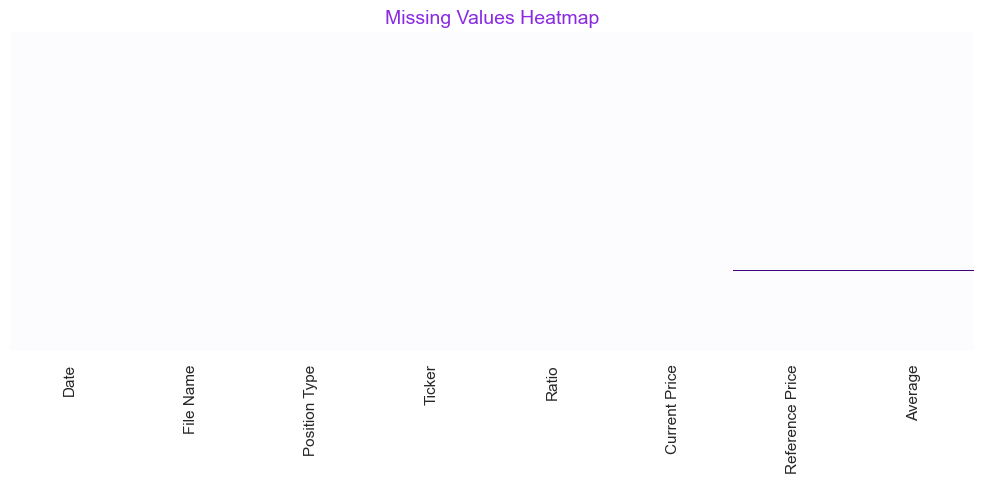


=== Numeric Features ===
🔢 Numeric columns: ['Ratio', 'Current Price', 'Reference Price', 'Average']


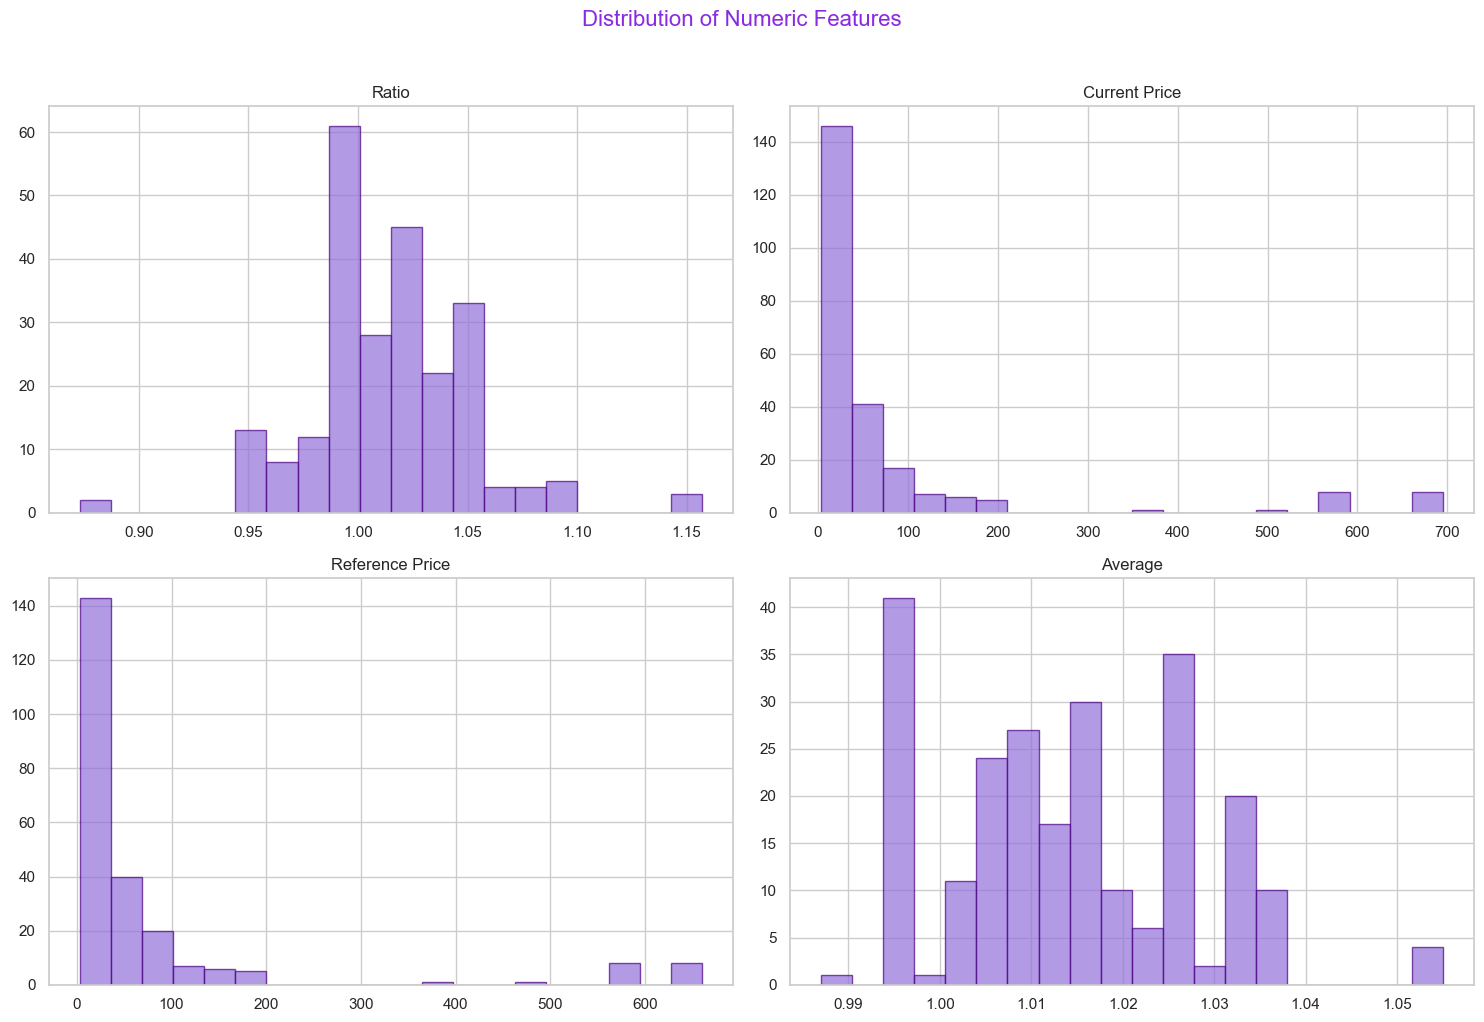

C:\Users\hnaji\AppData\Local\Temp\ipykernel_29624\3053952558.py:55: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[numeric_cols], orient='h', palette=["#FF69B4", "#DA70D6"])


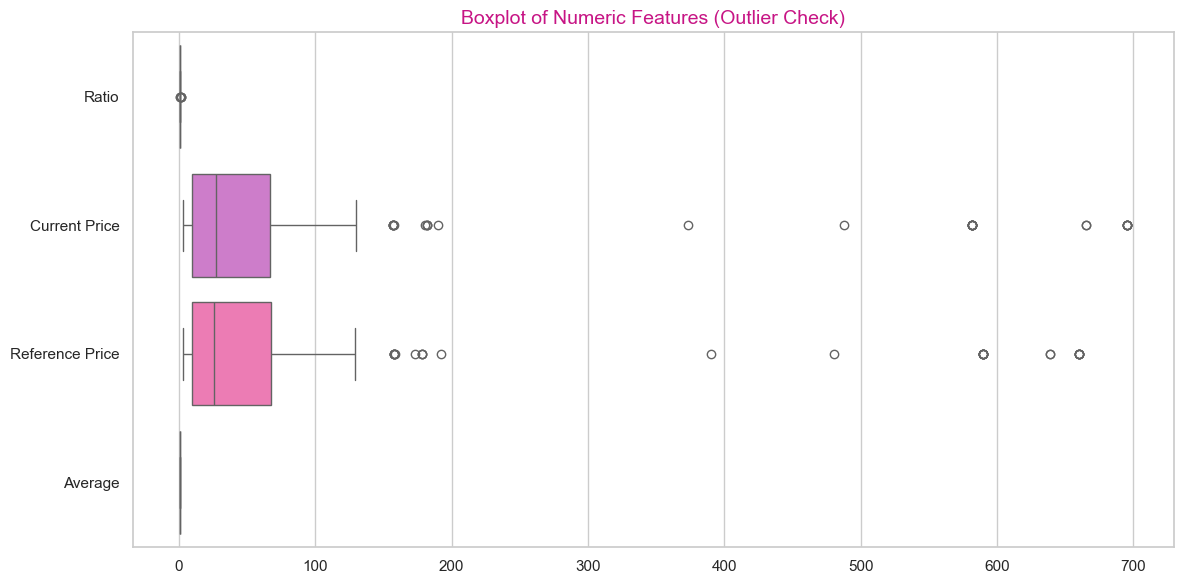


=== Feature Correlations ===


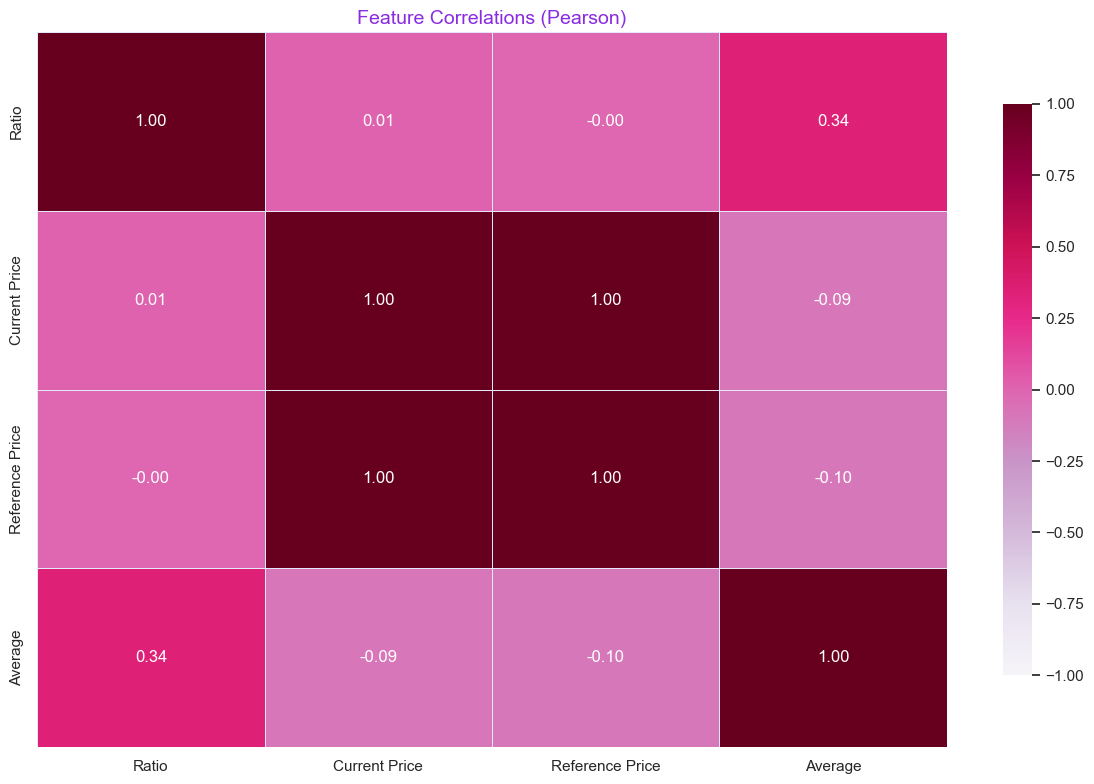


=== Categorical Features ===
📝 Categorical columns: ['File Name', 'Position Type', 'Ticker']

📊 Value counts for 'File Name':
File Name
Big_500_20_LONG_SHORT_F.pdf          40
Cap_250-1000m_20_LONG_SHORT_F.pdf    40
AllCap_20_LONG_SHORT_F.pdf           37
Big_100_10_LONG_SHORT_F.pdf          20
AllCap_10_LONG_SHORT_F.pdf           20
Cap_250-1000m_10_LONG_SHORT_F.pdf    20
Big_500_10_LONG_SHORT_F.pdf          20
Big_100_5_LONG_SHORT_F.pdf           10
AllCap_5_LONG_SHORT_F.pdf            10
Big_500_5_LONG_SHORT_F.pdf            5
Name: count, dtype: int64


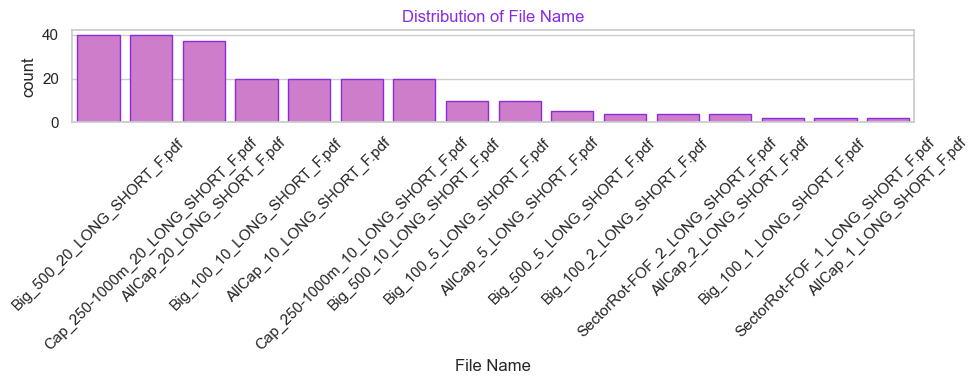


📊 Value counts for 'Position Type':
Position Type
S    121
L    119
Name: count, dtype: int64


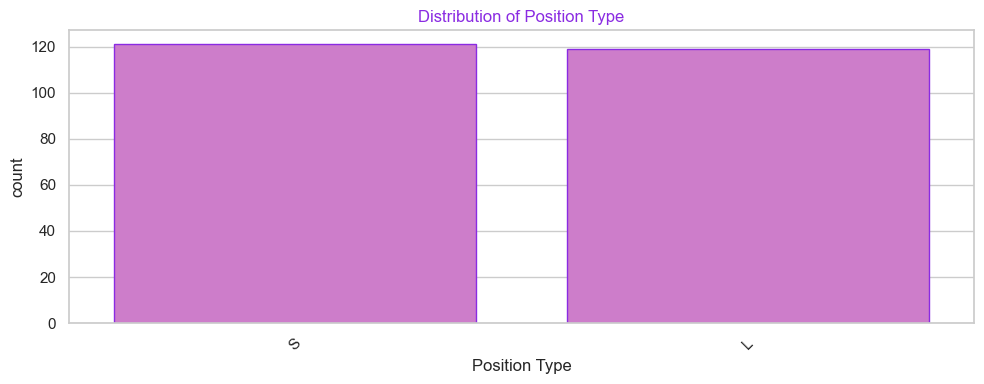


📊 Value counts for 'Ticker':
Ticker
AAPL    8
GBX     7
MRO     6
GOOG    6
AKS     6
DIS     5
CRM     5
MEMS    5
SBAC    5
FB      5
Name: count, dtype: int64

=== Data Scaling (StandardScaler) ===
✅ Numeric features scaled (mean=0, std=1).

📊 Scaled Data Summary:
        Ratio  Current Price  Reference Price  Average
count  240.00         240.00           239.00   239.00
mean    -0.00           0.00             0.00     0.00
std      1.00           1.00             1.00     1.00
min     -3.81          -0.50            -0.50    -2.05
25%     -0.52          -0.46            -0.46    -0.77
50%     -0.07          -0.34            -0.35    -0.17
75%      0.63          -0.09            -0.08     0.80
max      3.84           3.89             3.74     3.06


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_excel('../data/BusinessDS.xlsx')

# EDA (Missing values, distributions, correlations)
print(df.isnull().sum())
df.hist(figsize=(12, 8))
plt.show()

# Scale data (crucial for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Save scaled data
pd.DataFrame(X_scaled).to_csv('../outputs/scaled_data.csv', index=False)

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clusters (PCA-reduced)')
plt.show()